# LRES

## Questionnaire: Individual

In [1]:
#import import_ipynb
#import os
import pandas as pd
import numpy as np
from scipy import stats
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import random
from numpy import random as nprando
from datetime import datetime, date, time, timedelta
import pyreadstat
from tabulate import tabulate
from pyxll import xl_func, plot
######################################################################################### 

##SETUP##
sns.set()
nprando.seed(111)
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (12, 8)})
pd.set_option("display.max_columns",None)

##VARIABLES##
ind = "./Data/Individual_LRES_Baseline_Anon_V1.0.0.dta"
ind_d = "./Data/indderived_LRES_Baseline_Anon_V1.0.0.dta"
hh_d = "./Data/hhderived_LRES_Baseline_Anon_V1.0.0.dta"

##IMPORT##
#df_ind  = pd.read_stata(ind)
#df_ind_d  = pd.read_stata(ind_d)

df_ind , meta = pyreadstat.read_dta(ind, apply_value_formats=True)
df_ind_x , meta_x = pyreadstat.read_dta(ind, apply_value_formats=True)
df_ind_y , meta_y = pyreadstat.read_dta(ind, apply_value_formats=False)
df_ind_d , meta_d = pyreadstat.read_dta(ind_d, apply_value_formats=True)
df_hh_d , meta_d2 = pyreadstat.read_dta(hh_d, apply_value_formats=True)

#print(meta.column_names)
#print(meta.column_labels)
#print(meta.column_names_to_labels)
#print(meta.number_rows)
#print(meta.number_columns)
#print(meta.file_label)
#print(meta.file_encoding)

df_ind_x.columns=meta_x.column_labels
#df_ind_d.columns=meta_d.column_labels

for each in df_ind_x.columns:
    print(each)

Claim ID
Household identifier
Person identifier
Interview outcome
Treatment or Control
Type of Claim
Date of interview
Is this individual a CSM or NCSM?
Interviewer team
Interviewer code
a3 - Is the respondent age 15-17?
a4_1 - Does the caregiver consent?
a4_2 - Does the respondent consent?
a5 - Reason for refusal
a6 - Degree of interaction with person refusing
b1 - Respondent is main claimant on the land restitution claim?
b2_m - Date of birth (month)
b2_y - Date of birth (year)
b3 - Age intervals
b4 - Gender
b5 - Population group
b5_o - Other: Population group
b6 - Home language
b7_1 - Spouse/partner's PID
b7_3 - Partner's gender
b7_4 - Partner's age in years
b7_5 - Formally married or living with a partner?
b7_6 - No. of years married to this partner
b7_7 - No. of years living with this partner
b8_1 - Ever been married?
b8_2 - Currently married, widowed, divorced or separated?
b8_3 - How long have you been widowed?
b8_4 - How long have you been divorced or separated?
ca1 - Are you c

In [2]:
print("--------" + "\n" + '\033[1m' +"Raw Data: "+ '\033[0m' + 'Individual_LRES_Baseline_Anon_V1.0.0.dta' + "\n")
df_ind.describe(include="all") 

--------
Raw Data: Individual_LRES_Baseline_Anon_V1.0.0.dta



,claim_id,bl_hhid,pid,bl_i_outcome,bl_i_treatment,bl_i_claim_type,bl_i_intrv_date,bl_i_csm,bl_i_intrv_team,bl_i_intrv_code,bl_i_minor,bl_i_consentcaregiver,bl_i_consent,bl_i_refexpl,bl_i_refint,bl_i_claim,bl_i_dob_m,bl_i_dob_y,bl_i_age_intervals,bl_i_gen,bl_i_popgrp,bl_i_popgrp_o,bl_i_lng,bl_i_parhpid,bl_i_pargen,bl_i_parage,bl_i_mar,bl_i_mary_m,bl_i_mary_l,bl_i_evmar,bl_i_curmarst,bl_i_timewid,bl_i_timediv,bl_i_em1,bl_i_em1strtm,bl_i_em1strty,bl_i_em1showidbk,bl_i_em1dys,bl_i_em1hrs,bl_i_em1contr,bl_i_em1contr_d,bl_i_em1pdleave,bl_i_em2,bl_i_em2strtm,bl_i_em2strty,bl_i_em2dys,bl_i_em2hrs,bl_i_ems,bl_i_emsoth,bl_i_emsmn,bl_i_emshrs,bl_i_emsnumemp,bl_i_emstax,bl_i_emssll,bl_i_emslft,bl_i_emslft_brac1,bl_i_emslft_brac2,bl_i_emslft_brac3,bl_i_emslft_brac4,bl_i_emslft_brac5,bl_i_emslft_brac6,bl_i_emslft_cat,bl_i_emsdbt,bl_i_emsdbt_brac1,bl_i_emsdbt_brac2,bl_i_emsdbt_brac3,bl_i_emsdbt_brac4,bl_i_emsdbt_brac5,bl_i_emsdbt_brac6,bl_i_emsdbt_cat,bl_i_emsfinr,bl_i_emsincifr,bl_i_emsincifr_brac1,bl_i_emsincifr_brac2,bl_i_emsincifr_brac3,bl_i_emsincifr_brac4,bl_i_emsincifr_brac5,bl_i_emsincifr_brac6,bl_i_emsincifr_cat,bl_i_emsincyr,bl_i_emsprofloss,bl_i_emsprof_a,bl_i_emsloss_a,bl_i_emsincfr,bl_i_emsincfr_a,bl_i_emsincfr_brac1,bl_i_emsincfr_brac2,bl_i_emsincfr_brac3,bl_i_emsincfr_brac4,bl_i_emsincfr_brac5,bl_i_emsincfr_brac6,bl_i_emsincfr_cat,bl_i_emc,bl_i_emchrs,bl_i_unemprv,bl_i_unemdc,bl_i_unemex,bl_i_unemwnt,bl_i_unemwnt_v,bl_i_unemwnt_u,bl_i_unemrj,bl_i_unemrjex,bl_i_unemrjex_o,bl_i_unemmn,bl_i_unem3mn,bl_i_unem6mn,bl_i_unemyr,bl_i_unem2yr,bl_i_unems1,bl_i_unems2,bl_i_unems3,bl_i_unems4,bl_i_unems5,bl_i_unems6,bl_i_unems7,bl_i_unems8,bl_i_unems9,bl_i_unems10,bl_i_unems11,bl_i_unemava,bl_i_noemex,bl_i_noemex_o,bl_i_noemreswage,bl_i_noemsr,bl_i_noemsryr,bl_i_noemsrex,bl_i_noemsrex_o,bl_i_edschgrd,bl_i_edschgrd_o,bl_i_edschyr,bl_i_edschage,bl_i_edter,bl_i_edterlev,bl_i_edterlev_o,bl_i_edcur,bl_i_edcurex,bl_i_edcurex_o,bl_i_edlitcomp,bl_i_trst,bl_i_com1,bl_i_com2,bl_i_com3,bl_i_com4,bl_i_com5,bl_i_com6,bl_i_knw1,bl_i_knw2,bl_i_knw3,bl_i_knw4,bl_i_att1,bl_i_att2,bl_i_att3,bl_i_ld1,bl_i_ld2,bl_i_wblv,bl_i_trstcls,bl_i_trststrn,bl_i_ownveh,bl_i_ownveh_v,bl_i_ownmot,bl_i_ownmot_v,bl_i_owncom,bl_i_owncom_v,bl_i_owncel,bl_i_owncel_v,bl_i_dtbnk,bl_i_dtbnk_b,bl_i_dtmic,bl_i_dtmic_b,bl_i_dtstubnk,bl_i_dtstubnk_b,bl_i_dtstuo,bl_i_dtstuo_b,bl_i_dtcre,bl_i_dtcre_b,bl_i_dtstr,bl_i_dtstr_b,bl_i_dthp,bl_i_dthp_b,bl_i_dtflloan,bl_i_dtflloan_b,bl_i_dtfrloan,bl_i_dtfrloan_b,bl_i_dtmsh,bl_i_dtmsh_b,bl_i_dtemploan,bl_i_dtemploan_b,bl_i_dtunpdtax,bl_i_dtunpdtax_b,bl_i_dtserarr,bl_i_dtserarr_b,bl_i_dtoth,bl_i_dtoth_b,bl_i_aslifeins,bl_i_aslifeins_v,bl_i_aspen,bl_i_aspen_v,bl_i_asstvl,bl_i_asstvl_v,bl_i_asacc,bl_i_asacc_v,bl_i_emobth,bl_i_emomnd,bl_i_emodep,bl_i_emoeff,bl_i_emohope,bl_i_emofear,bl_i_emoslp,bl_i_emohap,bl_i_emolone,bl_i_emogo,bl_i_flup,bl_i_flnc,bl_i_flner,bl_i_flconf,bl_i_flpos,bl_i_flcc,bl_i_flcont,bl_i_flot,bl_i_flang,bl_i_flow,bl_i_relocate
count,1670.0,1671,1671,1671,1524,1524,1671,1665,1357.0,1354.0,1129.0,88.0,1351,1,1,1350,1350,1350,3,1350,1350,1671,1350,1349,69,69,452,403,51,754,105,96,60,1350,457,457,457,457,457,457,457,457,457,5.0,5.0,5,5,1350,102,102,102,102,102,102,28,14,1,6,0,3,1,14,12,7,3,1,3,0,0,7,102,61,26,12,1,6,1,0,26,61,41,19,12,41,16,5,0,3,0,3,2,5,1350,84,736,148,30,736,226,226,226,6,1671,226,182,152,129,111,194,116,66,29,15,6,3,1,1,0,0,226,519,1671,580,346,75,75,1671,1350,1671,1316,1316,1350,334,1671,1350,1148,1671,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,289,1350,3.0,1350,222,1350,1133,1350,153,1350,13,1350,4.0,1350,20,1350,133,1350,250,1350,34,1350,13,1350,20,1350,15,1350,4,1350,7,1350,27,1350,24,1350,214,1350,183,1350,79,1350,856,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,551
unique,100.0,654,1671,2,2,2,1600,2,16.0,66.0,2.0,1.0,1,1,1,4,14,66,1,4,7,3,11,289,2,39,4,54,23,3,4,27,27,3,14,43,3,9,15,3,5,3,2

In [3]:
print("--------" + "\n" + '\033[1m' +"Derived Data: "+ '\033[0m' + 'indderived_LRES_Baseline_Anon_V1.0.0.dta' + "\n")
df_ind_d.describe()

--------
Derived Data: indderived_LRES_Baseline_Anon_V1.0.0.dta



,claim_id,bl_hhid,pid,bl_id_best_age_yrs,bl_id_best_age_intervals,bl_id_best_dob_m,bl_id_best_dob_y,bl_id_best_race,bl_id_best_gen,bl_id_best_marstt,bl_id_best_edu,bl_id_empl_stat,bl_id_ces_d_10_score
count,1357,1357,1357,1357,1357,1357,1357,1357,1357,1357,1357,1357,1357
unique,97,623,1357,66,15,13,65,5,3,6,27,5,28
top,663,65100006,800004,59,15-19,June,2003,African,Female,Never Married,Grade 12/Std. 10/Form 5/Matric/Senior Certificate,Employed,3
freq,202,5,1,37,147,135,36,982,743,659,287,614,101


In [4]:
df_ind_0 = df_ind.iloc[:, 0:8]
df_ind_d_1 = pd.merge(df_ind_0,df_ind_d, how='outer', left_on=["claim_id","bl_hhid","pid"],right_on=["claim_id","bl_hhid","pid"])
#df_ind_d_1.describe(include='all')

In [5]:
df_hh_d_0 = df_hh_d.iloc[:, 0:10]
df_hh_d_1 = pd.merge(df_hh_d_0,df_ind_d, how='right', left_on=["claim_id","bl_hhid"],right_on=["claim_id","bl_hhid"])
#df_hh_1.describe(include='all')

#### SAMPLE

In [6]:
df_csm=df_ind_d_1[['bl_i_csm',]]
df_csm_g = df_csm.groupby(['bl_i_csm']).value_counts().rename('count').reset_index()
df_csm_g['pct'] = df_csm_g['count']/sum(df_csm_g['count'])*100
df_csm_g

,bl_i_csm,count,pct
0,CSM,690,41.441441
1,NCSM,975,58.558559


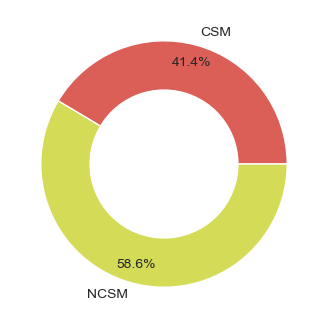

In [7]:
#
colors =sns.color_palette("hls")[0:3]
labels = df_csm_g['bl_i_csm'].to_list()
explodes= (0.05,0.05)

#plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[4,4]
sns.set_style("whitegrid")

plt.pie(df_csm_g['pct'], labels=labels,colors=colors,  pctdistance=0.85, autopct='%.1f%%')

centre = plt.Circle((0,0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre)

#plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
#plt.title(['Treatment', 'Control'])
#plt.suptitle('Gender', fontsize=14)
plt.xlabel('')
#plt.ylabel('')
##legends
#h,l = ax.get_legend_handles_labels()
#col_lgd = plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
#plt.gca().add_artist(col_lgd)
plt.savefig("ind_csm.svg")
plt.show()

plt.close()

In [8]:
df_s_0=df_hh_d_1[["claim_id","bl_hhid","pid",'bl_hd_prov2011', 'bl_hd_geo2011']]
df_s = pd.get_dummies(df_s_0, prefix='',prefix_sep='', columns=['bl_hd_geo2011'])
df_s_g = df_s[['Urban','Traditional','Farms','bl_hd_prov2011']].groupby(['bl_hd_prov2011']).sum()
df_s_g =df_s_g.drop('Missing')

In [9]:
#df_s_ct1 = pd.crosstab(index=df_s_0['bl_hd_geo2011'], columns=df_s_0['bl_hd_prov2011'], rownames=[""], colnames=[""],  margins=True, margins_name="Total")
#df_s_ct1

df_s_ct2 = pd.crosstab(index=df_s_0['bl_hd_geo2011'], columns=df_s_0['bl_hd_prov2011'], rownames=[""], colnames=[""],  margins=True, margins_name="Total", normalize=True)
df_s_ct2.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')

,Eastern Cape,Gauteng,KwaZulu-Natal,Limpopo,Missing,Mpumalanga,North West,Western Cape,Total
,,,,,,,,,
Farms,0.15%,0.00%,0.00%,0.00%,0.00%,1.18%,0.00%,0.44%,1.77%
Missing,0.00%,0.00%,0.00%,0.00%,0.74%,0.00%,0.00%,0.00%,0.74%
Traditional,14.96%,0.96%,0.15%,0.88%,0.00%,3.39%,0.37%,0.00%,20.71%
Urban,16.21%,13.41%,1.99%,0.00%,0.00%,11.94%,0.00%,33.24%,76.79%
Total,31.32%,14.37%,2.14%,0.88%,0.74%,16.51%,0.37%,33.68%,100.00%


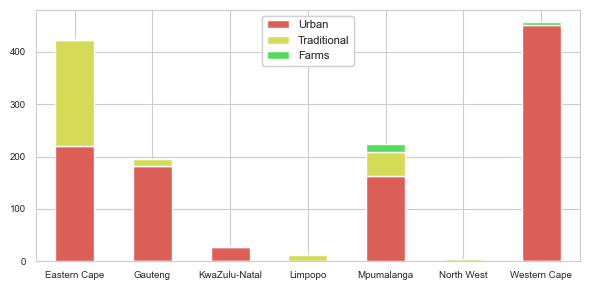

In [10]:
plt.rcParams["figure.figsize"]=[6,3]
sns.set_palette("hls")
plt.rcParams["figure.autolayout"] =True
sns.set_style("whitegrid")
ax = df_s_g.plot.bar(stacked=True)
#ax.axes.get_xaxis().set_visible(False)
#table = ax.tables[0]
plt.title('', fontsize=12)
plt.xticks(fontsize=7, rotation='horizontal')
plt.yticks(fontsize=7)
plt.xlabel('')
plt.ylabel('')

##legends
h,l = ax.get_legend_handles_labels()
col_lgd = plt.legend(loc='upper center', fontsize=8)
plt.gca().add_artist(col_lgd)

#Total

'''total = len(df_s_g)
for p in ax.patches:
    pct = f'{100* p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(pct, (x,y), ha='center', va= 'center')'''
#Table
'''tableRowLength = len(df_s_g.columns)
tableColLength = len(df_s_g.index)
cellWidth = table.get_celld()[(1,1)].get_width()
cellHeight = table.get_celld()[(1,1)].get_height()
for cIx in range(0, tableColLength):
    c= table.add_cell(tableRowLength + 1, cIx, cellWidth, cellHeight)
    c.set
    c.get_text().set_text(df_s_g.iloc[cIx].sum())
'''
plt.savefig("ind_sample_2.svg")
plt.tight_layout()
plt.show()



plt.close()


----------------------------------------------------------------
#### DEMOGRAPHICS

In [11]:
df_age1=df_ind_d_1[["claim_id","bl_hhid","pid",'bl_i_treatment', 'bl_id_best_age_yrs']]
df_age1 = df_age1.dropna()
df_age1['bl_id_best_age_yrs'] = pd.to_numeric(df_age1['bl_id_best_age_yrs'], errors='coerce')
#df_age.describe()
df_age1_tg = df_age1.loc[:,['bl_i_treatment', 'bl_id_best_age_yrs']].groupby(['bl_i_treatment']).mean()
print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_id_best_age_yrs')]  + "\n")
df_age1_tg

--------
Outcome (derived): Best age - years



,bl_id_best_age_yrs
bl_i_treatment,
Control,42.383305
Treatment,40.891927


In [12]:
df_age2=df_ind_d_1[["claim_id","bl_hhid","pid",'bl_i_treatment', 'bl_i_csm', 'bl_id_best_gen', 'bl_id_best_age_intervals']]
df_age2_ct = pd.crosstab(index=df_age2['bl_id_best_age_intervals'], columns=df_age2['bl_id_best_gen'], rownames=[""], colnames=[""], margins=True, margins_name="Total", dropna=False, normalize=True)
print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_id_best_age_intervals')] +"*"+ "\n")
#df_age2_ct
#print(tabulate(df_age2_ct, headers=['Age', 'Female','Male',"Other",'\033[1m' +'Total'+ '\033[0m'], tablefmt='fancy_grid' ))

t1 = tabulate(df_age2_ct, headers=['Age', 'Female','Male',"Other",'\033[1m' +'Total'+ '\033[0m'], tablefmt='fancy_grid' )
print("*Total includes 314 missing observations")

df_age2_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')

--------
Outcome (derived): Best age intervals*

*Total includes 314 missing observations


,Female,Male,Other,Total
,,,,
10-14,0.15%,0.22%,0.00%,0.37%
15-19,4.64%,6.19%,0.00%,10.83%
20-24,4.50%,4.42%,0.00%,8.92%
25-29,5.53%,3.76%,0.00%,9.29%
30-34,5.38%,3.91%,0.07%,9.36%
35-39,4.86%,3.76%,0.00%,8.62%
40-44,3.98%,3.98%,0.07%,8.03%
45-49,4.57%,3.02%,0.00%,7.59%
50-54,5.45%,3.83%,0.07%,9.36%


In [13]:

df_age_3=df_ind_d_1[['bl_id_best_age_intervals']]
#print(sum(df_age_3g['count']))
df_age_3g = df_age_3.groupby(['bl_id_best_age_intervals']).value_counts().rename('count').reset_index()
df_age_3g['pct'] = df_age_3g['count']/sum(df_age_3g['count'])*100
df_age_3g

,bl_id_best_age_intervals,count,pct
0,10-14,5,0.368460
1,15-19,147,10.832719
2,20-24,121,8.916728
3,25-29,126,9.285188
4,30-34,127,9.358880
5,35-39,117,8.621960
6,40-44,109,8.032424
7,45-49,103,7.590273
8,50-54,127,9.358880
9,55-59,145,10.685335


In [14]:


df_age2
df_age2csm = pd.get_dummies(df_age2, prefix='',prefix_sep='', columns=['bl_i_csm'])
#df_emp.describe()
df_age2csm_g = df_age2csm[['bl_id_best_gen',"bl_id_best_age_intervals", 'CSM']].groupby(['bl_id_best_gen', "bl_id_best_age_intervals"]).sum().reset_index()
df_age2csm_g

df_age2csm_ct = pd.crosstab(index=df_age2csm['bl_id_best_age_intervals'], columns=df_age2csm['bl_id_best_gen'], values=df_age2csm['CSM'], aggfunc=np.sum, rownames=[""], colnames=[""], margins=True, margins_name="Total")
#df_age2csm_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')
df_age2csm_ct

,Female,Male,Other,Total
,,,,
10-14,1.0,0.0,0,1.0
15-19,8.0,4.0,0,12.0
20-24,9.0,9.0,0,18.0
25-29,19.0,15.0,0,34.0
30-34,25.0,18.0,1,44.0
35-39,28.0,29.0,0,57.0
40-44,27.0,30.0,1,58.0
45-49,31.0,24.0,0,55.0
50-54,43.0,32.0,0,75.0


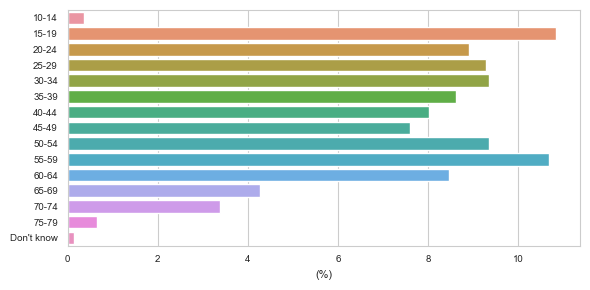

In [15]:
#df_age2 = df_age2.set_index("bl_id_best_age_intervals", drop=False)
#df_age2 = df_age2.drop("Don't know")

sns.set_palette("hls",3)
#plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[6,3]
sns.set_style("whitegrid")
ax=sns.barplot(data=df_age_3g, y="bl_id_best_age_intervals", x='pct')
plt.title('', fontsize=12)
plt.xlabel('(%)',fontsize=8)
plt.ylabel('')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
##legends
#h,l = ax.get_legend_handles_labels()
#col_lgd = plt.legend( loc='upper right', title='', fontsize=8)
#plt.gca().add_artist(col_lgd)
plt.savefig("ind_demographics_3.svg")
plt.show()

plt.close()

In [16]:
df_race=df_ind_d_1[["claim_id","bl_hhid","pid",'bl_i_treatment', 'bl_id_best_race']]
df_race_ct = pd.crosstab(index=df_race['bl_id_best_race'], columns=df_race['bl_i_treatment'], rownames=[""], colnames=[""], margins=True, margins_name="Total", normalize=True)*100
print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_id_best_race')]  + "\n")
df_race_ct.astype(float).applymap(lambda x: str(format(x,'.2f'))+'%')

--------
Outcome (derived): Best population group



,Control,Treatment,Total
,,,
African,31.47%,40.90%,72.37%
Asian/Indian,0.59%,1.03%,1.62%
Coloured,10.61%,14.52%,25.13%
Don't know,0.44%,0.29%,0.74%
White,0.15%,0.00%,0.15%
Total,43.26%,56.74%,100.00%


In [17]:
df_gen_0=df_ind_d_1[["claim_id","bl_hhid","pid",'bl_i_treatment', 'bl_id_best_gen']]
df_gen_ct = pd.crosstab(index=df_gen_0['bl_id_best_gen'], columns=df_gen_0['bl_i_treatment'], rownames=[""], colnames=[""], margins=True, margins_name="Total", normalize=True)*100
print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_id_best_gen')]  + "\n")
df_gen_ct.astype(float).applymap(lambda x: str(format(x,'.2f'))+'%')

df_gen=df_ind_d_1[['bl_id_best_gen']]
df_gen_g = df_gen.groupby(['bl_id_best_gen']).value_counts().rename('count').reset_index()
df_gen_g['pct'] = df_gen_g['count']/sum(df_gen_g['count'])*100
df_gen_g

--------
Outcome (derived): Best gender



,bl_id_best_gen,count,pct
0,Female,743,54.753132
1,Male,608,44.804716
2,Other,6,0.442152


In [18]:
df_gen = pd.get_dummies(df_gen_0, prefix='',prefix_sep='', columns=['bl_i_treatment'])
#df_emp.describe()
df_gen_tg = df_gen[['bl_id_best_gen','Treatment', 'Control']].groupby(['bl_id_best_gen']).sum()
#df_gen_cg = df_gen.loc[df_gen["bl_i_treatment"]=="ontrol"][['bl_id_best_gen','pid']].groupby(['bl_id_best_gen']).count()

#df_emp_g = df_emp_g.reset_index(drop=False)
#df_gen_g

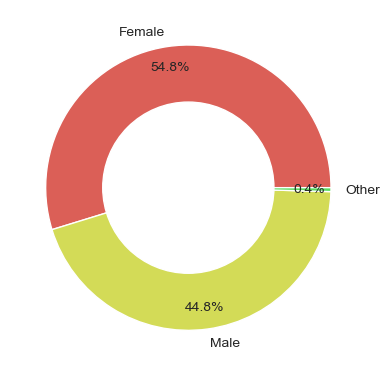

In [19]:
#
colors =sns.color_palette("hls")[0:4]
labels = df_gen_g['bl_id_best_gen'].to_list()
explodes= (0.05,0.05)

#plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[4,4]
sns.set_style("whitegrid")

plt.pie(df_gen_g['pct'], labels=labels,colors=colors,  pctdistance=0.85, autopct='%.1f%%')

centre = plt.Circle((0,0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre)#plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
#plt.title(['Treatment', 'Control'])
#plt.suptitle('Gender', fontsize=14)
plt.xlabel('')
#plt.ylabel('')
##legends
#h,l = ax.get_legend_handles_labels()
#col_lgd = plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
#plt.gca().add_artist(col_lgd)
plt.savefig("ind_gender.svg")
plt.show()

plt.close()

In [20]:
df_mar=df_ind_d_1[["claim_id","bl_hhid","pid",'bl_i_treatment', 'bl_id_best_marstt']]
df_mar_ct = pd.crosstab(index=df_mar['bl_id_best_marstt'], columns=df_mar['bl_i_treatment'], rownames=[""], colnames=[""], margins=True, margins_name="Total", normalize=True)*100
print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_id_best_marstt')]  + "\n")
df_mar_ct.astype(float).applymap(lambda x: str(format(x,'.2f'))+'%')


--------
Outcome (derived): Best marital status



,Control,Treatment,Total
,,,
Divorced or Seperated,1.62%,2.87%,4.50%
Living with Partner,1.47%,2.36%,3.83%
Married,15.77%,16.73%,32.50%
Missing,1.69%,1.69%,3.39%
Never Married,19.75%,28.81%,48.56%
Widow/Widower,2.95%,4.27%,7.22%
Total,43.26%,56.74%,100.00%


---------------------------------------------------------
#### EDUCATION

In [21]:
df_edu_0=df_hh_d_1[["claim_id","bl_hhid","pid",'bl_hd_prov2011', 'bl_id_best_edu']]
df_edu_ct = pd.crosstab(index=df_edu_0['bl_id_best_edu'], columns=df_edu_0['bl_hd_prov2011'], rownames=[""], colnames=[""], margins=True, margins_name="Total", normalize=True)*100
print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_id_best_edu')]  + "\n")
df_edu_ct.astype(float).applymap(lambda x: str(format(x,'.2f'))+'%')
df_edu_ct

--------
Outcome (derived): Best education



,Eastern Cape,Gauteng,KwaZulu-Natal,Limpopo,Missing,Mpumalanga,North West,Western Cape,Total
,,,,,,,,,
Bachelors Degree,0.810612,0.589536,0.073692,0.000000,0.000000,0.147384,0.000000,0.957996,2.579219
Bachelors Degree and Diploma,0.810612,0.294768,0.073692,0.000000,0.000000,0.000000,0.000000,0.515844,1.694915
Certificate not requiring Grade 12/Std. 10,0.957996,0.663228,0.000000,0.000000,0.000000,0.810612,0.000000,1.621223,4.053058
Certificate requiring Grade 12/Std. 10,0.736920,1.179071,0.221076,0.000000,0.073692,0.884304,0.000000,0.736920,3.831982
Diploma not requiring Grade 12/Std. 10,0.294768,0.221076,0.000000,0.000000,0.000000,0.000000,0.073692,0.515844,1.105380
Diploma requiring Grade 12/Std. 10,1.031688,1.473839,0.221076,0.073692,0.000000,0.957996,0.000000,1.694915,5.453206
Grade 1/Sub A/Class 1,0.294768,0.147384,0.000000,0.000000,0.000000,0.294768,0.000000,0.147384,0.884304
Grade 10/Std. 8/Form 3,3.610906,1.400147,0.073692,0.000000,0.000000,1.179071,0.073692,5.232130,11.569639
Grade 11/Std. 9/Form 4,4.421518,1.621223,0.515844,0.294768,0.073692,2.800295,0.000000,3.463522,13.190862


In [22]:
df_edu = pd.get_dummies(df_edu_0, prefix='',prefix_sep='', columns=['bl_id_best_edu'])
df_edu = df_edu.rename(columns={'No schooling':'No Schooling', 'Other (specify)':'Other'})
df_edu['Primary Education'] = df_edu[['Grade 1/Sub A/Class 1','Grade 2/Sub B/Class 2','Grade 3/Std. 1','Grade 4/Std. 2','Grade 5/Std. 3','Grade 6/Std. 4','Grade 7/Std. 5']].sum(axis=1)
df_edu['Secondary Education (excl. Matric)'] = df_edu[['Grade 8/Std. 6/Form 1','Grade 9/Std. 7/Form 2','Grade 10/Std. 8/Form 3','Grade 11/Std. 9/Form 4']].sum(axis=1)
df_edu['Matric'] = df_edu[['Grade 12/Std. 10/Form 5/Matric/Senior Certificate']].sum(axis=1)
df_edu['Diploma and/or Certificate'] = df_edu[['Certificate not requiring Grade 12/Std. 10','Certificate requiring Grade 12/Std. 10', 'Diploma not requiring Grade 12/Std. 10', 'Diploma requiring Grade 12/Std. 10']].sum(axis=1)
df_edu['National Vocational or NATED Qualification'] = df_edu[['National Certificate Vocational 2 (NCV 2)','National Certificate Vocational 3 (NCV 3)','National Certificate Vocational 4 (NCV 4)','N6 (NATED)']].sum(axis=1)
df_edu['Tertiary Degree'] = df_edu[['Bachelors Degree','Bachelors Degree and Diploma','Honours Degree','Higher Degree (Masters, Doctorate)']].sum(axis=1)
df_edu_g = df_edu[['No Schooling', 'Primary Education', 'Secondary Education (excl. Matric)', 'Matric','Tertiary Degree','National Vocational or NATED Qualification', 'Diploma and/or Certificate','Other','bl_hd_prov2011']].groupby(['bl_hd_prov2011']).sum()
df_edu_g = df_edu_g.drop("Missing")

#df_edu_g= df_edu['bl_hd_prov2011','Primary School']
#df_edu_g['Primary School %'] = df_edu['Primary School']/df_edu.groupby('bl_hd_prov2011')['Primary School'].transform('sum')
#df_edu_g

df_edu_g

,No Schooling,Primary Education,Secondary Education (excl. Matric),Matric,Tertiary Degree,National Vocational or NATED Qualification,Diploma and/or Certificate,Other
bl_hd_prov2011,,,,,,,,
Eastern Cape,11,78,180,83,24,4,41,1
Gauteng,2,13,70,46,12,3,48,1
KwaZulu-Natal,0,1,12,7,3,0,6,0
Limpopo,0,3,5,3,0,0,1,0
Mpumalanga,17,28,81,55,2,4,36,1
North West,0,0,3,1,0,0,1,0
Western Cape,3,63,199,89,29,7,62,4


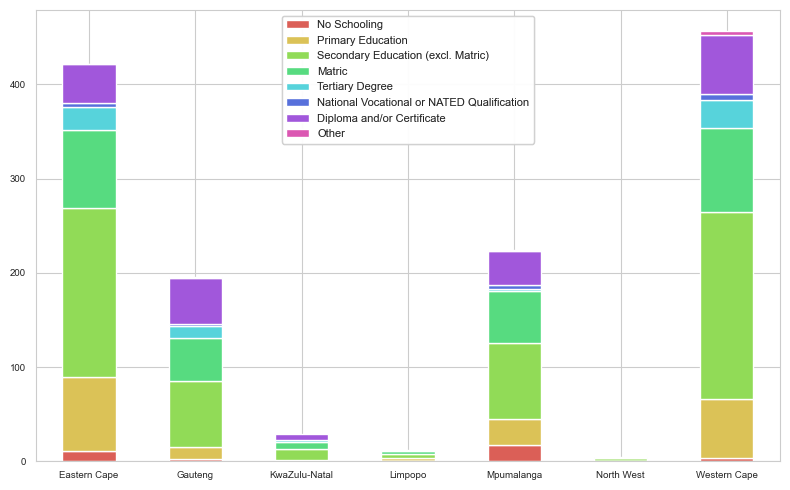

--------
No Schooling: No schooling

Matric: Grade 12/Std. 10/Form 5/Matric/Senior Certificate

Tertiary Degree: Bachelors Degree; Bachelors Degree and Diploma; Honours Degree; Higher Degree (Masters, Doctorate)



In [23]:
#
sns.set_palette("hls",8)
#plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[8,5]
sns.set_style("whitegrid")
ax = df_edu_g.plot.bar(stacked=True)
#ax.axes.get_xaxis().set_visible(False)
#table = ax.tables[0]
plt.title('', fontsize=12)
#plt.title('Highest Education', fontsize=12)
plt.xlabel('')
plt.xticks(fontsize=7, rotation='horizontal')
plt.yticks( fontsize=7)

##legends
h,l = ax.get_legend_handles_labels()
col_lgd = plt.legend(loc='upper center', fontsize=8)
plt.gca().add_artist(col_lgd)

#Table
'''tableRowLength = len(df_edu_tg.columns)
tableColLength = len(df_edu_tg.index)
cellWidth = table.get_celld()[(1,1)].get_width()
cellHeight = table.get_celld()[(1,1)].get_height()
for cIx in range(0, tableColLength):
    c= table.add_cell(tableRowLength + 1, cIx, cellWidth, cellHeight)
    c.set
    c.get_text().set_text(df_edu_tg.iloc[cIx].sum())'''
    
plt.savefig("ind_education_2.svg")
plt.show()

print("--------" + "\n" + '\033[1m' + 'No Schooling: ' + '\033[0m' + 'No schooling'+ "\n")
print('\033[1m' + 'Matric: ' + '\033[0m' + 'Grade 12/Std. 10/Form 5/Matric/Senior Certificate'+ "\n")
print('\033[1m' + 'Tertiary Degree: ' + '\033[0m' + 'Bachelors Degree; Bachelors Degree and Diploma; Honours Degree; Higher Degree (Masters, Doctorate)'  + "\n")

plt.close()

----------------------------------------------------------------------
#### EMPLOYMENT

In [24]:
df_emp=df_hh_d_1[["claim_id","bl_hhid","pid",'bl_hd_prov2011', 'bl_id_empl_stat']]
df_emp_ct = pd.crosstab(index=df_emp['bl_hd_prov2011'], columns=df_emp['bl_id_empl_stat'], rownames=[""], colnames=[""], margins=True, margins_name="Total", normalize=True)
print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_id_empl_stat')]  + "\n")
df_emp_pct = df_emp_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')
df_emp_pct = df_emp_pct.drop("Missing")
df_emp_pct

--------
Outcome (derived): Employment status



,Employed,Not Economically Active,Refused,Unemployed - Discouraged,Unemployed - Strict,Total
,,,,,,
Eastern Cape,10.61%,15.18%,0.15%,0.66%,4.72%,31.32%
Gauteng,7.66%,4.79%,0.00%,0.00%,1.92%,14.37%
KwaZulu-Natal,1.47%,0.37%,0.00%,0.00%,0.29%,2.14%
Limpopo,0.22%,0.29%,0.00%,0.22%,0.15%,0.88%
Mpumalanga,7.96%,5.31%,0.00%,0.37%,2.87%,16.51%
North West,0.07%,0.29%,0.00%,0.00%,0.00%,0.37%
Western Cape,16.88%,10.69%,0.81%,2.36%,2.95%,33.68%
Total,45.25%,37.14%,0.96%,3.68%,12.97%,100.00%


In [25]:
df_emp_0=df_hh_d_1[["claim_id","bl_hhid","pid",'bl_hd_prov2011', 'bl_id_empl_stat']]
df_emp = pd.get_dummies(df_emp_0, prefix='',prefix_sep='', columns=['bl_id_empl_stat'])
#df_emp.describe()
df_emp_g = df_emp[['Not Economically Active','Unemployed - Discouraged','Unemployed - Strict','Employed','bl_hd_prov2011']].groupby(['bl_hd_prov2011']).sum()
df_emp_g = df_emp_g.drop("Missing")

df_emp_pg_0 = df_emp_0.groupby(['bl_hd_prov2011', 'bl_id_empl_stat'])['bl_id_empl_stat'].count().rename('count').reset_index()
df_emp_pg_0['pct'] = df_emp_pg_0['count']/sum(df_emp_pg_0['count'])*100

df_emp_pg_pt = pd.pivot_table(df_emp_pg_0, index=['bl_hd_prov2011'], columns=['bl_id_empl_stat'], values=['pct'], aggfunc=np.sum)
df_emp_pg_pt.drop('Missing')
df_emp_pg_pt

#df_trs_x_g = df_trs_x_g.drop([0,2])
#df_emp_pg_0
#df_emp_pg

pct                                    \
bl_id_empl_stat   Employed Not Economically Active   Refused   
bl_hd_prov2011                                                 
Eastern Cape     10.611643               15.180545  0.147384   
Gauteng           7.663965                4.789978  0.000000   
KwaZulu-Natal     1.473839                0.368460  0.000000   
Limpopo           0.221076                0.294768  0.000000   
Missing           0.368460                0.221076  0.000000   
Mpumalanga        7.958732                5.305822  0.000000   
North West        0.073692                0.294768  0.000000   
Western Cape     16.875461               10.685335  0.810612   

                                                              
bl_id_empl_stat Unemployed - Discouraged Unemployed - Strict  
bl_hd_prov2011                                                
Eastern Cape                    0.663228            4.716286  
Gauteng                         0.000000            1.915991  
KwaZulu-Natal                   0.000000            0.294768  
Limpopo                         0.221076            0.147384  
Missing                         0.073692            0.073692  
Mpumalanga                      0.368460            2.873987  
North West                      0.000000            0.000000  
Western Cape                    2.358143            2.947679

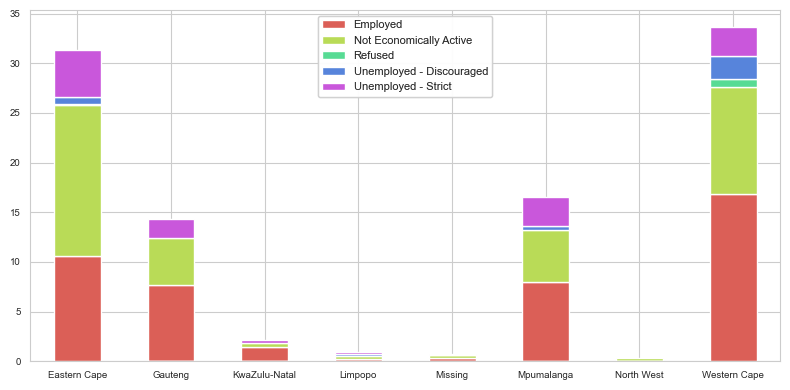

In [26]:
#
labels = ['Employed','Not Economically Active','Refused','Unemployed - Discouraged','Unemployed - Strict',]
sns.set_palette("hls",5)
#plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[8,4]
sns.set_style("whitegrid")
ax = df_emp_pg_pt.plot.bar(stacked=True)
#ax = df_emp_g.plot.bar(stacked=True,grid=True, table=True)
#ax.axes.get_xaxis().set_visible(False)
#table = ax.tables[0]
plt.title('', fontsize=12)
plt.xlabel('')
plt.xticks(fontsize=7,rotation='horizontal')
plt.yticks(fontsize=7)

##legends
h,l = ax.get_legend_handles_labels()
col_lgd = plt.legend(labels=labels, loc='upper center', fontsize=8)
plt.gca().add_artist(col_lgd)

#Table
'''tableRowLength = len(df_emp_g.columns)
tableColLength = len(df_emp_g.index)
cellWidth = table.get_celld()[(1,1)].get_width()
cellHeight = table.get_celld()[(1,1)].get_height()
for cIx in range(0, tableColLength):
    c= table.add_cell(tableRowLength + 1, cIx, cellWidth, cellHeight)
    c.set
    c.get_text().set_text(df_emp_g.iloc[cIx].sum())'''
    
plt.savefig("ind_employment_1.svg")
plt.show()

plt.close()

---------------------------------------------------------
#### UNEMPLOYMENT

In [27]:
df_unemp=df_ind[["claim_id","bl_hhid","pid",'bl_i_treatment', 'bl_i_unemex']]
#df_unemp=df_unemp.rename(columns={'bl_i_treatment':"Treatment"})
df_unemp_ct = pd.crosstab(index=df_unemp['bl_i_treatment'] , columns=df_unemp['bl_i_unemex'], rownames=[""], colnames=[""],margins=True, margins_name="Total", normalize=True)
print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_unemex')]  + "\n")
df_unemp_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')

df_unemp=df_ind[['bl_i_unemex']]
df_unemp_g = df_unemp.groupby(['bl_i_unemex']).value_counts().rename('count').reset_index()
df_unemp_g['pct'] = df_unemp_g['count']/sum(df_unemp_g['count'])*100
df_unemp_g
#df_unempx=df_ind['bl_i_unemex']

--------
Question: ce3 - Reason behind cessation of last work related activity



,bl_i_unemex,count,pct
0,Caring for own children/relatives,3,10.000000
1,Changed residence,1,3.333333
2,Dissatisfied with the job,1,3.333333
3,Going to school,3,10.000000
4,Health reasons,2,6.666667
5,Lost job/job ended/laid off/business sold/clos...,15,50.000000
6,Other family/community responsibilities,2,6.666667
7,Pregnancy,1,3.333333
8,Retired,2,6.666667


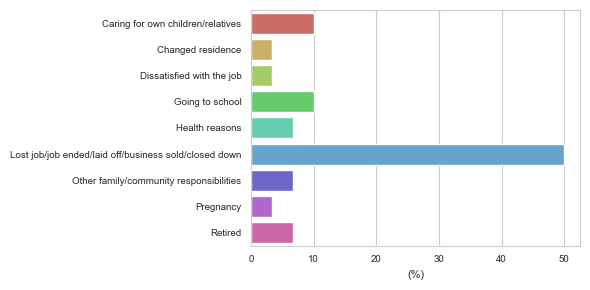

In [28]:
plt.rcParams["figure.figsize"]=[6,3]
sns.set_palette("hls",9)
plt.rcParams["figure.autolayout"] =True
sns.set_style("whitegrid")
#ax= df_unemp_g.pivot(index='bl_i_unemex', columns='count',values='pct').plot(kind='barh', stacked=True, rot=90)
#ax = sns.countplot(data=df_unemp, y='bl_i_unemex')
g = sns.barplot(data=df_unemp_g, x='pct', y='bl_i_unemex')
#plt.xlim(0,1)
#ax = df_unemp_g.plot.barh(stacked=True)
#ax.axes.get_xaxis().set_visible(False)
#table = ax.tables[0]
#plt.title('Number of Surveyed Individuals', fontsize=12)
plt.xlabel('(%)', fontsize=8)
plt.ylabel('')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
##legends
#h,l = ax.get_legend_handles_labels()
#col_lgd = plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
#plt.gca().add_artist(col_lgd)
plt.savefig("ind_unemployment_1.svg")
plt.show()

plt.close()


#### TRUST

In [29]:
df_trs_0=df_ind[["claim_id","bl_hhid","pid",  'bl_i_treatment', 'bl_i_trst','bl_i_wblv','bl_i_trstcls','bl_i_trststrn']]
df_trs_ct = pd.crosstab(index=df_trs_0['bl_i_trstcls'] , columns=df_trs_0['bl_i_trststrn'], rownames=[""], colnames=[""], margins=True, margins_name="Total",normalize=True)
print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_trstcls')]  + "\n")
print(meta.column_labels[(meta.column_names).index('bl_i_trststrn')]  + "\n")
df_trs_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')


--------
Question: e7_1 - Likeliness of neighbour returning wallet containing R250

e7_2 - Likeliness of stranger returning wallet containing R250



,Don't know,Not likely at all,Refused,Somewhat likely,Very likely,Total
,,,,,,
Don't know,0.67%,0.81%,0.00%,0.07%,0.07%,1.63%
Not likely at all,0.44%,64.89%,0.15%,3.26%,0.59%,69.33%
Refused,0.00%,0.37%,0.37%,0.00%,0.00%,0.74%
Somewhat likely,0.30%,14.15%,0.00%,4.67%,0.96%,20.07%
Very likely,0.07%,4.37%,0.07%,2.00%,1.70%,8.22%
Total,1.48%,84.59%,0.59%,10.00%,3.33%,100.00%


In [30]:
df_trs_1 = df_ind_y[["claim_id","bl_hhid",'pid','bl_i_trst','bl_i_trstcls','bl_i_trststrn']]
df_trs_1 = df_trs_1.replace(to_replace=[-9,-8, -5, -3], value= np.NaN)

df_trs = df_trs_1.rename(columns={'bl_i_trstcls':"Likeliness of neighbour returning a wallet (R250)", 'bl_i_trststrn':'Likeliness of stranger returning a wallet (R250)'})

df_trs_long = pd.melt(df_trs, id_vars=['claim_id','bl_hhid','pid', 'bl_i_trst'], value_vars=["Likeliness of neighbour returning a wallet (R250)","Likeliness of stranger returning a wallet (R250)" ])

#df_hh_1_long
#df_trs_long_pt = pd.pivot_table(df_trs_long, index=['variable'], columns=['bl_hd_prov2011'], values='value', aggfunc=np.mean, margins=True, margins_name="Total")
#print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + "Household Expenditure per Item" + "\n")
#df_trs_long_pt

df_trs_g = df_trs[['Likeliness of neighbour returning a wallet (R250)', 'Likeliness of stranger returning a wallet (R250)', 'bl_i_trst']].groupby(['bl_i_trst']).mean().reset_index()
#df_trs_long_g['pct'] = df_trs_long_g['value']/no_obs*100
df_trs_g

,bl_i_trst,Likeliness of neighbour returning a wallet (R250),Likeliness of stranger returning a wallet (R250)
0,1.0,2.435567,2.804627
1,2.0,2.710291,2.841163


In [31]:
print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_trst')]  + "\n")

df_trs_1=df_ind[['bl_i_trst']]
df_trs_1_g = df_trs_1.groupby(['bl_i_trst']).value_counts().rename('count').reset_index()
df_trs_1_g['pct'] = df_trs_1_g['count']/sum(df_trs_1_g['count'])*100
#df_trs_x_g = df_trs_x_g.drop([0,2])
df_trs_1_g

--------
Question: e1 - Generally speaking, most people can be trusted?



,bl_i_trst,count,pct
0,Don't know,38,2.814815
1,No,907,67.185185
2,Refused,6,0.444444
3,Yes,399,29.555556


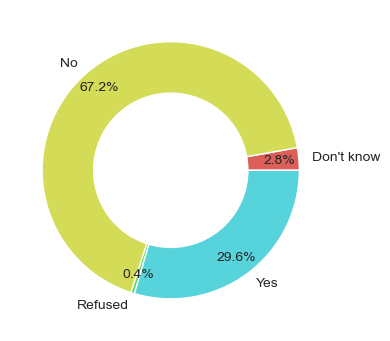

In [32]:
colors =sns.color_palette("hls")[0:5]
labels = df_trs_1_g['bl_i_trst'].to_list()
explodes= (0.05,0.05)

#plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[4,4]
sns.set_style("whitegrid")

plt.pie(df_trs_1_g['pct'], labels=labels,colors=colors,  pctdistance=0.85, autopct='%.1f%%')

centre = plt.Circle((0,0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre)#plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
#plt.title(['Treatment', 'Control'])
#plt.suptitle('Gender', fontsize=14)
plt.xlabel('')
#plt.ylabel('')
##legends
#h,l = ax.get_legend_handles_labels()
#col_lgd = plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
#plt.gca().add_artist(col_lgd)

plt.savefig("ind_trust_1.svg")
plt.show()

plt.close()


In [33]:
df_trs_ct2 = pd.crosstab(index=df_trs_0['bl_i_treatment'] , columns=df_trs_0['bl_i_wblv'], rownames=[""], colnames=[""], margins=True, margins_name="Total", normalize=True)
print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_wblv')]  + "\n")
df_trs_ct2.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')


--------
Question: e6 - Preference to continue living in current area



,Don't know,Moderate preference to leave,Moderate preference to stay,Refused,Strong preference to leave,Strong preference to stay,Unsure (no strong preference to stay or leave),Total
,,,,,,,,
Control,0.30%,3.04%,3.19%,0.22%,6.15%,26.30%,3.93%,43.11%
Treatment,0.59%,3.11%,7.26%,0.22%,5.70%,33.63%,6.37%,56.89%
Total,0.89%,6.15%,10.44%,0.44%,11.85%,59.93%,10.30%,100.00%


In [34]:
df_sc_0 = df_ind[["claim_id","bl_hhid",'pid','bl_i_treatment','bl_i_com1','bl_i_com2','bl_i_com3','bl_i_com4','bl_i_com5','bl_i_com6', 'bl_i_knw1', 'bl_i_knw2', 'bl_i_knw3','bl_i_knw4','bl_i_att1','bl_i_att2','bl_i_att3']]


#df_knw

In [35]:
df_com = pd.get_dummies(df_sc_0, prefix=['com1','com2','com3','com4','com5','com6'],prefix_sep='.', columns=['bl_i_com1','bl_i_com2','bl_i_com3','bl_i_com4','bl_i_com5','bl_i_com6'])
df_com = df_com.rename(columns={'com1.Yes':'...community project','com2.Yes':'...religious group', 'com3.Yes':'...music group','com4.Yes':'...sports club','com5.Yes':'...stokvel group','com6.Yes':'...political party'})
df_com_long = pd.melt(df_com, id_vars=['claim_id','bl_hhid','pid','bl_i_treatment'], value_vars=['...community project','...religious group','...music group','...sports club','...stokvel group','...political party'])
#df_com = df_com.rename(columns={'com1.Yes':'Com1','com2.Yes':'Com2', 'com3.Yes':'Com3','com4.Yes':'Com4','com5.Yes':'Com5','com6.Yes':'Com6'})
#df_com_long = pd.melt(df_com, id_vars=['claim_id','bl_hhid','pid','bl_i_treatment'], value_vars=['Com1','Com2','Com3','Com4','Com5','Com6'])

print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m'  + "\n")
print('\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_com1')]  + "\n")
print('\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_com2')]  + "\n")
print('\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_com3')]  + "\n")
print('\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_com4')]  + "\n")
print('\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_com5')]  + "\n")
print('\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_com6')]  + "\n")
#df_knw_long_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')

#df_knw_long_ct = pd.crosstab(index=df_knw_long['bl_i_treatment'] , columns=df_knw_long['variable'], values='value', aggfunc=np.sum,rownames=[""], colnames=[""],margins=True, margins_name="Total", normalize=True)
#df_knw_long_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')

df_sc_1 = df_ind[['bl_i_com1']]
no_obs = df_sc_1.bl_i_com1.notnull().sum()
df_com_long_g = df_com_long[['value', 'variable']].groupby(['variable']).sum().reset_index()
df_com_long_g['pct'] = df_com_long_g['value']/no_obs*100
df_com_long_g['Q:'] = 'Is a member or involved in... '
df_com_long_g


--------
Question: 

e2_1 - Currently involved in projects aimed to improve the lives of others?

e2_2 - Member of a church, mosque or other organised religious group?

e2_3 - Member of a choir, band or music organisation?

e2_4 - Member of a sports club or team?

e2_5 - Member of a stokvel or microcredit group?

e2_6 - Member of a political party?



,variable,value,pct,Q:
0,...community project,217.0,16.074074,Is a member or involved in...
1,...music group,122.0,9.037037,Is a member or involved in...
2,...political party,122.0,9.037037,Is a member or involved in...
3,...religious group,845.0,62.592593,Is a member or involved in...
4,...sports club,108.0,8.000000,Is a member or involved in...
5,...stokvel group,67.0,4.962963,Is a member or involved in...


In [36]:
df_knw = pd.get_dummies(df_sc_0, prefix=['knw1', 'knw2', 'knw3','knw4'],prefix_sep='.', columns=['bl_i_knw1', 'bl_i_knw2', 'bl_i_knw3','bl_i_knw4'])
df_knw = df_knw.rename(columns={'knw1.Yes':'...find a job','knw2.Yes':'...start a project', 'knw3.Yes':'...give legal advice','knw4.Yes':'...lend large money'})
df_knw_long = pd.melt(df_knw,  value_vars=['...find a job','...start a project','...give legal advice','...lend large money'])
#df_knw = df_knw.rename(columns={'knw1.Yes':'Knw1','knw2.Yes':'Knw2', 'knw3.Yes':'Knw3','knw4.Yes':'Knw4'})
#df_knw_long = pd.melt(df_knw,  value_vars=['Knw1','Knw2','Knw3','Knw4'])

print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m'  + "\n")
print('\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_knw1')]  + "\n")
print('\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_knw2')]  + "\n")
print('\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_knw3')]  + "\n")
print('\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_knw4')]  + "\n")
#df_knw_long_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')

#df_knw_long_ct = pd.crosstab(index=df_knw_long['bl_i_treatment'] , columns=df_knw_long['variable'], values='value', aggfunc=np.sum,rownames=[""], colnames=[""],margins=True, margins_name="Total", normalize=True)
#df_knw_long_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')

df_sc_1 = df_ind[["bl_i_knw1"]]
no_obs = df_sc_1.bl_i_knw1.notnull().sum()
df_knw_long_g = df_knw_long[['value', 'variable']].groupby(['variable']).sum().reset_index()
df_knw_long_g['pct'] = df_knw_long_g['value']/no_obs*100
df_knw_long_g['Q:'] = 'Knows someone can help them...'
df_knw_long_g


--------
Question: 

e3_1 - Know someone who could help you find a job?

e3_2 - Know someone who could help you with a project you want to start?

e3_3 - Know someone who could help you with advice about matters of law?

e3_4 - Know someone who could help you by lending you a large amount of money?



,variable,value,pct,Q:
0,...find a job,277.0,20.518519,Knows someone can help them...
1,...give legal advice,264.0,19.555556,Knows someone can help them...
2,...lend large money,95.0,7.037037,Knows someone can help them...
3,...start a project,185.0,13.703704,Knows someone can help them...


In [37]:
df_att = pd.get_dummies(df_sc_0, prefix=['att1','att2','att3'],prefix_sep='.', columns=['bl_i_att1','bl_i_att2','bl_i_att3'])
df_att = df_att.rename(columns={'att1.Yes':'...attended council meeting','att2.Yes':'...contacted politician', 'att3.Yes':'...alerted police'})
df_att_long = pd.melt(df_att,  value_vars=['...attended council meeting','...contacted politician','...alerted police'])
#df_att = df_att.rename(columns={'att1.Yes':'Att1','att2.Yes':'Att2', 'att3.Yes':'Att3'})
#df_att_long = pd.melt(df_att,  value_vars=['Att1','Att2','Att3'])

print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m'  + "\n")
print('\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_att1')]  + "\n")
print('\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_att2')]  + "\n")
print('\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_att3')]  + "\n")
#df_knw_long_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')

#df_knw_long_ct = pd.crosstab(index=df_knw_long['bl_i_treatment'] , columns=df_knw_long['variable'], values='value', aggfunc=np.sum,rownames=[""], colnames=[""],margins=True, margins_name="Total", normalize=True)
#df_knw_long_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')

df_sc_1 = df_ind[["bl_i_att1"]]
no_obs = df_sc_1.bl_i_att1.notnull().sum()
#print(no_obs)
df_att_long_g = df_att_long[['value', 'variable']].groupby(['variable']).sum().reset_index()
df_att_long_g['pct'] = df_att_long_g['value']/no_obs*100
df_att_long_g['Q:'] = 'In past year, they… '
df_att_long_g


--------
Question: 

e4_1 - Attended council meeting, public hearing or public discussion in last yea

e4_2 - Met with a politician, called him/her, or sent a letter in last year?

e4_3 - Notified police or court about a local problem in last year?



,variable,value,pct,Q:
0,...alerted police,84.0,6.222222,"In past year, they…"
1,...attended council meeting,313.0,23.185185,"In past year, they…"
2,...contacted politician,69.0,5.111111,"In past year, they…"


In [38]:
df_sc_long_g = pd.concat([df_com_long_g,df_knw_long_g,df_att_long_g], ignore_index=True)
df_sc_long_g

,variable,value,pct,Q:
0,...community project,217.0,16.074074,Is a member or involved in...
1,...music group,122.0,9.037037,Is a member or involved in...
2,...political party,122.0,9.037037,Is a member or involved in...
3,...religious group,845.0,62.592593,Is a member or involved in...
4,...sports club,108.0,8.000000,Is a member or involved in...
5,...stokvel group,67.0,4.962963,Is a member or involved in...
6,...find a job,277.0,20.518519,Knows someone can help them...
7,...give legal advice,264.0,19.555556,Knows someone can help them...
8,...lend large money,95.0,7.037037,Knows someone can help them...
9,...start a project,185.0,13.703704,Knows someone can help them...


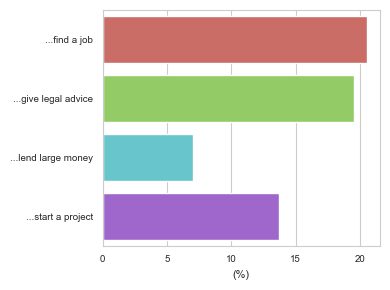

In [39]:
plt.rcParams["figure.figsize"]=[4,3]
sns.set_palette("hls",4)
plt.rcParams["figure.autolayout"] =True
sns.set_style("whitegrid")
#ax= df_unemp_g.pivot(index='bl_i_unemex', columns='count',values='pct').plot(kind='barh', stacked=True, rot=90)
ax = sns.barplot(data=df_knw_long_g, y='variable', x='pct')
#(ax.set_axis_labels("(%)",""))
#plt.xlim(0,1)
#ax = df_unemp_g.plot.barh(stacked=True)
#ax.axes.get_xaxis().set_visible(False)
#table = ax.tables[0]
#plt.title('Number of Surveyed Individuals', fontsize=12)
plt.xlabel('(%)', fontsize=8)
plt.ylabel('')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
##legends
#h,l = ax.get_legend_handles_labels()
#col_lgd = plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
#plt.gca().add_artist(col_lgd)
plt.savefig("ind_socialcapital_1.svg")
plt.show()

plt.close()

----------------------------------------------------------------------------
#### EMOTIONAL HEALTH

In [40]:
df_ind_1 = df_ind.loc[:,['claim_id','bl_hhid','pid','bl_i_treatment', 'bl_i_emobth','bl_i_emomnd', 'bl_i_emodep','bl_i_emoeff','bl_i_emohope','bl_i_emofear','bl_i_emoslp','bl_i_emohap','bl_i_emolone','bl_i_emogo']]
#df_ind_1=df_ind_1.rename(columns={'bl_i_treatment':"Treatment"})
#df_ind_1.describe()

In [41]:
#Aggregate Depression Scale
df_dep=df_ind_d_1[['bl_i_treatment', 'bl_id_ces_d_10_score']]
df_dep = df_dep.dropna()
df_dep['bl_id_ces_d_10_score'] = pd.to_numeric(df_dep['bl_id_ces_d_10_score'], errors='coerce') 
df_dep_tg = df_dep.loc[:,['bl_i_treatment', 'bl_id_ces_d_10_score']].groupby(['bl_i_treatment']).mean()
#df_dep_ct = pd.crosstab(index=df_dep['bl_id_ces_d_10_score'], columns=df_dep['bl_i_treatment'], rownames=[""], colnames=[""], margins=True, margins_name="Total", normalize=True)*100
print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_id_ces_d_10_score')]  + "\n")
df_dep_tg


--------
Outcome (derived): CES-D-10 depression score (out of 30)



,bl_id_ces_d_10_score
bl_i_treatment,
Control,7.842294
Treatment,8.915209


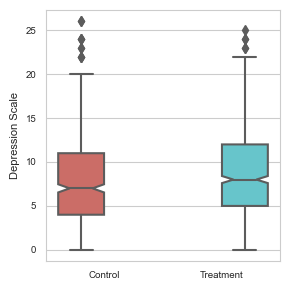

In [74]:
#
sns.set_palette("hls",2)
plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[3,3]
sns.set_style("whitegrid")
ax=sns.boxplot(data=df_dep, x='bl_i_treatment', y="bl_id_ces_d_10_score", hue='bl_i_treatment', notch=True)
plt.title('', fontsize=12)
plt.ylabel('Depression Scale', fontsize=8)
plt.xlabel('')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
##legends
#h,l = ax.get_legend_handles_labels()
col_lgd = plt.legend([],[], frameon=False)
#plt.gca().add_artist(col_lgd)
plt.savefig("ind_wellbeing.svg")
plt.show()

plt.close()

In [59]:
#df_emo = df_ind_1.loc[:, "Treatment":"bl_i_emogo"]
print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + "Centre for Epidemiological Studies Depression Scale (CES-D)" + "\n")


df_cesd_0 = df_ind_y.rename(columns={'bl_i_emobth':'CES-D 1','bl_i_emomnd':'CES-D 2', 'bl_i_emodep':'CES-D 3','bl_i_emoeff':'CES-D 4','bl_i_emohope':'CES-D 5','bl_i_emofear':'CES-D 6', 'bl_i_emoslp':'CES-D 7','bl_i_emohap':'CES-D 8','bl_i_emolone':'CES-D 9','bl_i_emogo':'CES-D 10'})
df_cesd_0 = df_cesd_0.replace(to_replace=[-9,-8, -5, -3], value= np.NaN)
df_cesd_long = pd.melt(df_cesd_0, id_vars=['claim_id','bl_hhid','pid','bl_i_treatment'], value_vars=['CES-D 1','CES-D 2','CES-D 3','CES-D 4','CES-D 5','CES-D 6','CES-D 7','CES-D 8','CES-D 9','CES-D 10'])


#df_cesd_long_pt = pd.pivot_table(df_cesd_long, index=['variable'], columns=['bl_i_treatment'], values='value', aggfunc=np.mean, margins=True, margins_name="Total")
#df_cesd_long_pt
#df_cesd_long.describe(include="all")

--------
Question: Centre for Epidemiological Studies Depression Scale (CES-D)



In [60]:
df_cesd_long_tg = df_cesd_long.loc[:,['value','bl_i_treatment','variable']].groupby(['bl_i_treatment','variable']).mean()
df_cesd_tg= df_cesd_long_tg.reset_index(drop=False)
#df_tt_tg['bl_tt_round_number'] = df_tt_tg['bl_tt_round_number'].replace({16:8, 17:9})
#df_tt_tg = df_tt_tg.dropna()
df_cesd_tg

,bl_i_treatment,variable,value
0,0.0,CES-D 1,1.678883
1,0.0,CES-D 10,1.706087
2,0.0,CES-D 2,1.721254
3,0.0,CES-D 3,1.693913
4,0.0,CES-D 4,2.127178
5,0.0,CES-D 5,3.010471
6,0.0,CES-D 6,1.646853
7,0.0,CES-D 7,1.760000
8,0.0,CES-D 8,2.989565
9,0.0,CES-D 9,1.585366


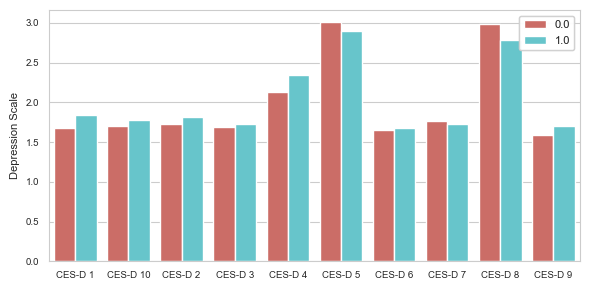

--------
CES-D 1: g1 - Respondent was unusually bothered in past week?

CES-D 2: g2 - Respondent had trouble focusing in past week?

CES-D 3: g3 - Respondent felt depressed in past week?

CES-D 4: g4 - Respondent felt that everything was an effort in past week?

CES-D 5: g5 - Respondent felt hopeful about the future in past week?

CES-D 6: g6 - Respondent felt fearful in past week?

CES-D 7: g7 - Respondent's sleep was restless in past week?

CES-D 8: g8 - Respondent was happy in past week?

CES-D 9: g9 - Respondent felt lonely in past week?

CES-D 10: g10 - Respondent could not get going in past week?



In [61]:
#
sns.set_palette("hls",2)
plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[6,3]
sns.set_style("whitegrid")
ax = sns.barplot(data=df_cesd_tg, x='variable', y="value", hue='bl_i_treatment')
#plt.title('Psychological Well-Being', fontsize=12)
plt.ylabel('Depression Scale',fontsize=8)
plt.xlabel('')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
##legends
h,l = ax.get_legend_handles_labels()
col_lgd = plt.legend(loc='upper right', fontsize=8)
plt.gca().add_artist(col_lgd)
plt.savefig("ind_wellbeing_0.svg")
plt.show()

print("--------" + "\n" + '\033[1m' + 'CES-D 1: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_emobth')]  + "\n")
print('\033[1m' + 'CES-D 2: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_emomnd')]  + "\n")
print('\033[1m' + 'CES-D 3: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_emodep')]  + "\n")
print('\033[1m' + 'CES-D 4: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_emoeff')]  + "\n")
print('\033[1m' + 'CES-D 5: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_emohope')]  + "\n")
print('\033[1m' + 'CES-D 6: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_emofear')]  + "\n")
print('\033[1m' + 'CES-D 7: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_emoslp')]  + "\n")
print('\033[1m' + 'CES-D 8: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_emohap')]  + "\n")
print('\033[1m' + 'CES-D 9: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_emolone')]  + "\n")
print('\033[1m' + 'CES-D 10: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_i_emogo')]  + "\n")

plt.close()

In [42]:
'''filename = "{}".format(sd) + "csvFamListx.csv"
with open('es_1.xlsx', mode='w', newline='',  encoding='utf-8') as myfile:
    exp_writer = csv.writer(myfile, delimiter=';')
    exp_writer.writerow(col_outlist)
    for record in outlistopt:
        exp_writer.writerow(record)'''
        
ws = pd.ExcelWriter('es_in_cesd.xlsx', engine='xlsxwriter')

'''df_csm_g.to_excel(ws, sheet_name='fig 2.3')
df_s_g.to_excel(ws, sheet_name='fig 2.4')
df_age_3g.to_excel(ws, sheet_name='fig 2.5')
df_gen_g.to_excel(ws, sheet_name='fig 2.6')
df_edu_g.to_excel(ws, sheet_name='fig 2.16')
df_emp_g.to_excel(ws, sheet_name='fig 2.17')
df_unemp_g.to_excel(ws, sheet_name='fig 2.18')
df_trs_1_g.to_excel(ws, sheet_name='fig 2.19')
df_sc_long_g.to_excel(ws, sheet_name='fig 2.20')
df_cesd_tg.to_excel(ws, sheet_name='fig 2.25')'''
df_dep.to_excel(ws, sheet_name='fig 3.25x')
ws.save()



In [63]:
!jupyter-nbconvert --no-input --no-prompt --to html es_in_1.ipynb

[NbConvertApp] Converting notebook es_in_1.ipynb to html
[NbConvertApp] Writing 629289 bytes to es_in_1.html
